In [34]:
from matplotlib.axes import Axes
from script import packetPreprocessing, packetsHandler
import decimal
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import gc
import importlib
importlib.reload(packetPreprocessing)
importlib.reload(packetsHandler)
from script.packetPreprocessing import *
from script.packetsHandler import *
import time


In [2]:
time_start=time.time()

wirelens=getwirelen(readPcap(""))

timestamps=readTimestamp("")



time_end=time.time()



In [3]:
print("time spent:"+str(time_end-time_start))

time spent:134.57590174674988


In [9]:
timestampsAndWirelens=list(zip(timestamps,wirelens))


82

In [35]:
packNums1,timestamps1,byteSlots0001, byteRates0001=splitToTimeSlot(timestampsAndWirelens, 0.001)


In [38]:
packNums1.__len__()

60000

In [42]:
data001=pd.DataFrame({
                  'timestamp':timestamps1,
                  'byterate':byteRates0001,
                  "packNum":  packNums1
                                 
                   })

data001.to_csv("data_for_0_001s_time_slot.csv",index=False)

# for label in fig.get_xticklabels():
#     if np.int(label.get_text()) % 100 == 0:  
#         label.set_visible(True)
#     else:
#         label.set_visible(False)

In [62]:

data001 = pd.read_csv("data_for_0_001s_time_slot.csv", 
                 # converters={'timestamp': lambda x:Decimal(str(x)) ,
                 #             'byterate': lambda x:Decimal(str(x))                             
                 #             }
                      )

In [109]:
np.arange(data001['timestamp'][0],data001['timestamp'].iloc[-1],0.1).__len__()
# data001['timestamp'][0]

# data001['timestamp'].iloc[-1]

600

In [ ]:
fig=sns.lineplot(x='timestamp',y='byterate',data=data001 )

fig.set_xticks(np.arange(data001['timestamp'][0],data001['timestamp'].iloc[-1],0.1))
fig.set_xticklabels(np.arange(0,len(data001),0.1))
figure=fig.get_figure()
figure.set_size_inches(200,10)
figure.savefig("byterate_for_0_001s_time_slot")
del fig,figure
gc.collect()

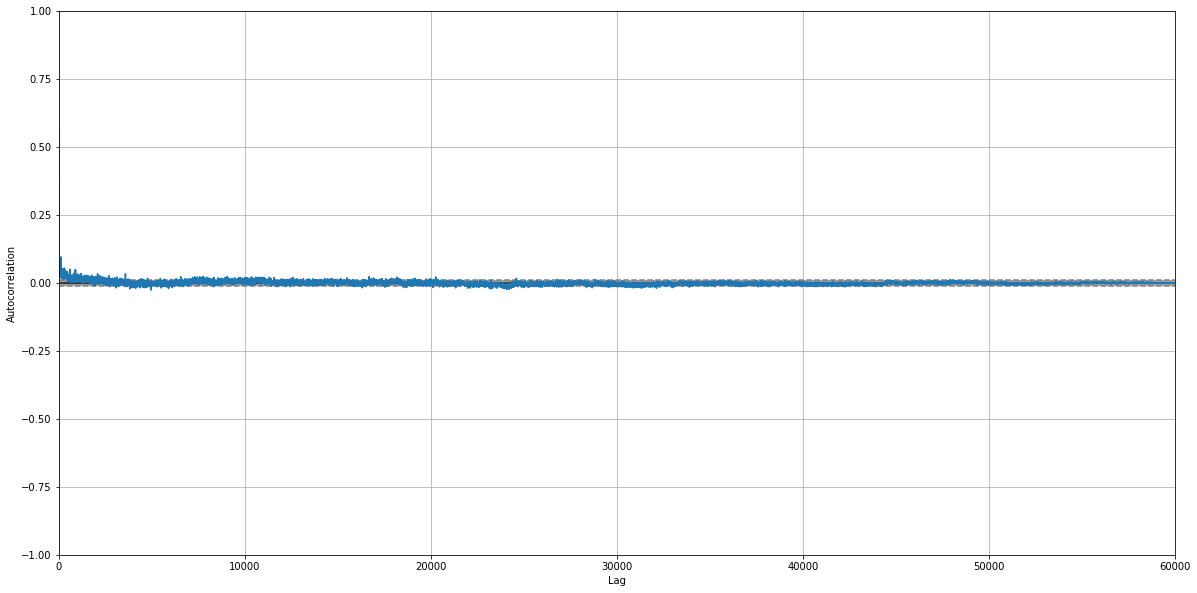

In [66]:
del fig,figure
gc.collect()

In [ ]:
autofig=pd.plotting.autocorrelation_plot(list(map(int,byteRates0001)))
autofig.get_figure().set_size_inches(20,10)
autofig.get_figure().savefig("autocorrelation_plot_0_001")

80

c:\users\zijun\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


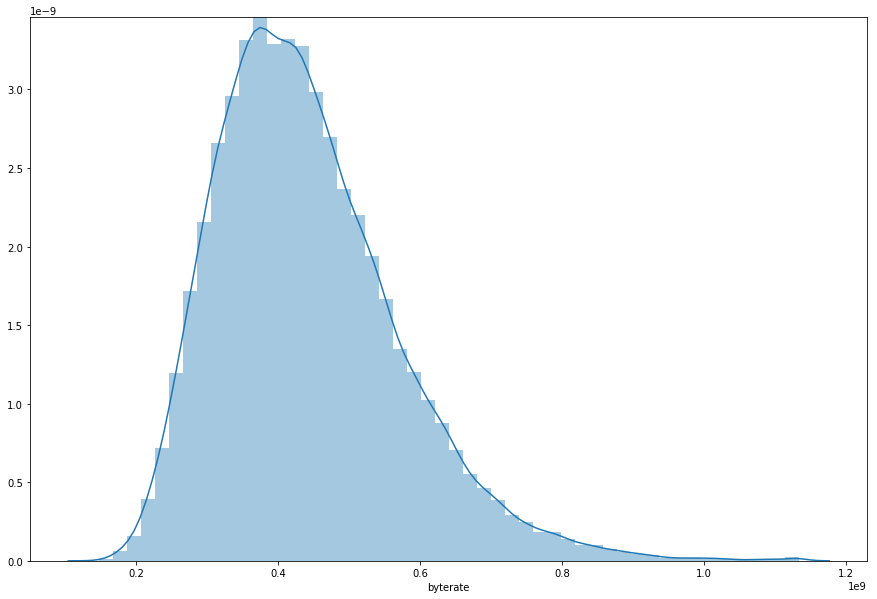

In [67]:
distfig=sns.distplot(data001['byterate'])
distfig.get_figure().set_size_inches(15,10)
distfig.get_figure().savefig("dist_plot_0_001_time_slot")

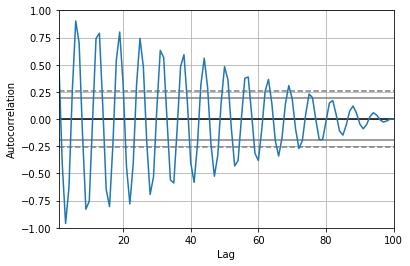

In [25]:


pd.plotting.autocorrelation_plot([math.sin(x) for x in range(100) ])